# Exercise #4: Linear Regression
The first part of this exercise shows the content of the Hands-On Tutorial. We will use some of the data again for the exercises below.

#Samples:	697
#Features:	149
Mean y:		38.80


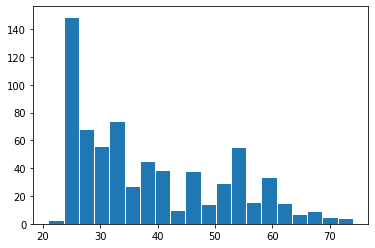

In [1]:
%matplotlib inline 
import numpy as np
import pylab as pl

#Load data
X = np.loadtxt("plant_genotype.csv", delimiter=",")
y = np.loadtxt("plant_flowering_time.csv")

print("#Samples:\t" + str(X.shape[0]))
print("#Features:\t" + str(X.shape[1]))

pl.hist(y, edgecolor="w", bins=20)
print("Mean y:\t\t%.2f" % y.mean())

In [2]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("Full Data:\t" + str(X.shape))
print("Train Data:\t" + str(X_train.shape))
print("Test Data:\t" + str(X_test.shape))

Full Data:	(697, 149)
Train Data:	(557, 149)
Test Data:	(140, 149)


In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_training = lr.predict(X_train)
predictions_testing = lr.predict(X_test)

print("MSE (Train):\t%.2f" % metrics.mean_squared_error(y_train, predictions_training))
print("R2 (Train):\t%.2f" % metrics.r2_score(y_train, predictions_training))
print("MSE (Test):\t%.2f" % metrics.mean_squared_error(y_test, predictions_testing))
print("R2 (Test):\t%.2f" % metrics.r2_score(y_test, predictions_testing))

MSE (Train):	57.02
R2 (Train):	0.66
MSE (Test):	82.15
R2 (Test):	0.44


In [4]:
print("True y\tPredicted y\tDifference")
for i in range(20):
    print("%.2f\t%.2f\t\t%.2f" % (y_test[i],
                                  predictions_testing[i],
                                  np.absolute(y_test[i]-predictions_testing[i])))

True y	Predicted y	Difference
26.00	25.28		0.72
53.00	56.24		3.24
32.00	36.92		4.92
55.00	57.44		2.44
31.00	31.50		0.50
26.00	37.38		11.38
45.00	46.76		1.76
26.00	48.43		22.43
24.00	34.04		10.04
26.00	27.20		1.20
33.00	39.21		6.21
47.00	42.86		4.14
43.00	41.52		1.48
39.00	38.44		0.56
24.00	24.34		0.34
34.00	36.79		2.79
33.00	38.58		5.58
63.00	62.83		0.17
46.00	37.76		8.24
38.00	47.28		9.28


In [5]:
lr.intercept_

36.6185144299119

In [6]:
lr.coef_

array([ 0.29143567, -0.86123008,  0.2552595 , -0.50577183,  0.42530054,
       -0.65959406,  0.05658822,  1.51516635,  0.65543233,  0.53508286,
        0.32932647,  0.5860826 , -1.47031058,  0.83137137, -0.78444837,
       -0.22628929,  1.27271554,  3.78550571, -0.14493321, -0.01121607,
       -0.21498947,  1.21701601, -0.17261671,  0.92833927, -0.49402808,
       -1.35337784, -0.36947977,  0.14198375,  0.25071938, -0.98036337,
        0.73738228,  0.85070464, -0.23916538,  0.01540188,  0.1679794 ,
        0.77100583,  0.11600772,  0.01579772, -0.17196121, -0.82046732,
       -0.0060945 , -0.66256636, -0.33612506, -0.0720868 , -0.0333238 ,
       -1.26475818,  0.71444606,  0.45251339,  0.61470051,  2.05980102,
       -0.2008214 ,  0.80633723,  1.14576235, -0.86849197,  1.9734602 ,
       -0.55822365,  0.54114517, -0.85921083, -1.10997203, -1.77064455,
        1.57549414,  1.85233725, -0.14672513, -0.00471542,  1.3945093 ,
       -0.12247869,  0.3272135 ,  0.12295457,  0.37479544,  1.81

## Exercise 4.1
Implement a 10-fold cross-validation for the plant data from this hands-on and compute the average $MSE$ and $R^2$ and its standard deviations across all folds. Do the results differ between training and testing? Are the results similar to a simple train/test split? 

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

#Your code comes here

## Exercise 4.2
We will simulate some data with 100 samples and one feature, as shown in the following code:

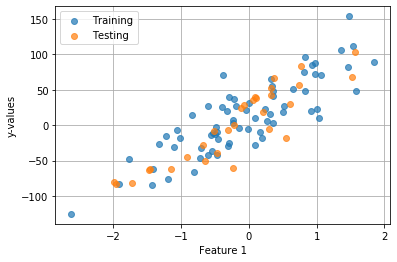

In [8]:
from sklearn.datasets import make_regression

x_d,y_d = make_regression(n_samples=100, n_features=1, 
                      n_informative=1, 
                      noise = 30, bias=10,
                      random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x_d,y_d, test_size=0.3)

pl.scatter(X_train,y_train,zorder=30,alpha=0.7,label="Training")
pl.scatter(X_test,y_test,zorder=30,alpha=0.7,label="Testing")
pl.grid(color="#AAAAAA")
pl.xlabel("Feature 1")
pl.ylabel("y-values")
pl.legend()

We have seperated the data into a training set of 70 samples and a testing set of 30 samples. You should first implement the linear regression model yourself (without using sklearn). Therefore, you should first write a function to estimate the $\beta$ values for a given data-matrix $X$ and target values $y$.  

Hint you have to integrate a columns of ones to the x data when you would like to use linear algebra for estimating the $\beta$'s. This can be done by using the function `np.column_stack`, e.g. `A = np.column_stack([np.ones(4),[2,3,4,5]])` will generate the matrix:

[[1., 2.],  
 [1., 3.],  
 [1., 4.],  
 [1., 5.]]
     

In [ ]:
def estimate_betas(x,y):
    #Write your code here

    #return betas
    return betas

Next write a function with the name `predict` to compute the $\hat y$ values for a given data matrix $x$:

In [ ]:
def predict(x,betas):
    #your code comes here

    #return predictions
    return y_hat

Now implement from scratch (without using sklearn) two performance measures, the root mean squared error and the $R^2$ score:

In [ ]:
def root_mean_squared_error(y_true,y_pred):
    #Your code comes here

    #return rmse
    return rmse

def r2_score(y_true,y_pred):
    #your code comes here

    #return r2
    return r2

Finally run the following code to test your implementations. The code will first estimate the $\beta$'s using the training data. Next it will predict $\hat y$ using the testing data. The $R^2$ and $RMSE$ value are the computed between the predictions and fitted regression line. Finally, we plot the training and testing points and visualize the line that we have estimated:

In [ ]:
#Estimate betas
betas = estimate_betas(X_train,y_train)

#compute predictions on test data
y_hat = predict(X_test,betas)

#compute RMSE and r2
r2 = r2_score(y_test,y_hat)
rmse = root_mean_squared_error(y_test,y_hat)

#plot regression line for an array of x-values
xs = np.linspace(-3,3,100)
ys = predict(xs, betas)

pl.plot(xs,ys,color="orange")
pl.scatter(X_train,y_train,zorder=30,alpha=0.7,label="Training")
pl.scatter(X_test,y_test,zorder=30,alpha=0.7,label="Testing")
pl.grid(color="#AAAAAA")
pl.xlabel("Feature 1")
pl.ylabel("y-values")
pl.legend()
pl.title("Beta0=%.2f, Beta1=%.2f" % (betas[0],betas[1]))
pl.text(1.1,-90,"RMSE=%.2f" % rmse)
pl.text(1.1,-70,"R2=%.2f" % r2)